In [1]:
import os
import torch
import numpy as np
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from utils import tools, metrics, criterion
from modules.vae_base_module import VAEBaseModule
from models import supported_models
from datasets import supported_datamodules

plt.style.use('seaborn')
config_file = '../configs/vae/vae_simple_mnist.yaml'
log_path = '../logs/NoveltyMNISTDataModule/SimpleVAE/version_0'
model_path = log_path + '/checkpoints/last.ckpt'

In [2]:
config = tools.load_config(config_file)
exp_params = config['experiment-parameters']
data_params = config['data-parameters']
module_params = config['module-parameters']

datamodule = supported_datamodules[exp_params['datamodule']](**data_params)
datamodule.setup('test')

model = supported_models[exp_params['model']](datamodule.data_shape, **module_params)

module = VAEBaseModule(model, **module_params)

checkpoint = torch.load(model_path)
module.load_state_dict(checkpoint['state_dict'])

Experimental parameters
------
{'data-parameters': {'batch_size': 128,
                     'root_data_path': '/home/fenrir/Documents/Datasets/NoveltyMNIST',
                     'train_fraction': 0.9},
 'experiment-parameters': {'datamodule': 'NoveltyMNISTDataModule',
                           'log_dir': 'logs',
                           'model': 'SimpleVAE',
                           'patience': None},
 'module-parameters': {'latent_nodes': 10, 'learning_rate': 0.01}}


<All keys matched successfully>

In [3]:
test_novelty_scores = []
test_novelty_labels = []
score_criterion = criterion.ReconsError()

module.model.eval()
with torch.no_grad():
    for batch_nb, batch_tuple in enumerate(datamodule.test_dataloader()):
        result = module.test_step(batch_tuple, batch_nb, score_criterion);
        test_novelty_scores.extend(result['scores'].numpy())
        test_novelty_labels.extend(result['labels'].numpy())

Testing with Reconstruction Error criterion


2021-04-28 18:12:06,059 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2021-04-28 18:12:06,059 - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
2021-04-28 18:12:06,060 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,060 - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
2021-04-28 18:12:06,061 - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
2021-04-28 18:12:06,061 - DEBUG - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,062 - DEBUG - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,062 - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) ita

2021-04-28 18:12:06,087 - DEBUG - findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal 700 normal>) = 11.335
2021-04-28 18:12:06,088 - DEBUG - findfont: score(<Font 'Sawasdee' (Sawasdee-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2021-04-28 18:12:06,088 - DEBUG - findfont: score(<Font 'Samyak Devanagari' (Samyak-Devanagari.ttf) normal normal 500 normal>) = 10.145
2021-04-28 18:12:06,088 - DEBUG - findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal 700 condensed>) = 10.535
2021-04-28 18:12:06,089 - DEBUG - findfont: score(<Font 'Norasi' (Norasi.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,089 - DEBUG - findfont: score(<Font 'Purisa' (Purisa-Bold.ttf) normal normal 700 normal>) = 10.335
2021-04-28 18:12:06,089 - DEBUG - findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Italic.otf) italic normal 400 normal>) = 11.05
2021-04-28 18:12:06,090 - DEBUG - findfont: score(<Font 'Lato' (Lato-Medium.ttf) normal

2021-04-28 18:12:06,111 - DEBUG - findfont: score(<Font 'C059' (C059-Italic.otf) italic normal 400 normal>) = 11.05
2021-04-28 18:12:06,111 - DEBUG - findfont: score(<Font 'Samyak Gujarati' (Samyak-Gujarati.ttf) normal normal 500 normal>) = 10.145
2021-04-28 18:12:06,111 - DEBUG - findfont: score(<Font 'RaghuMalayalamSans' (RaghuMalayalamSans-Regular.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,112 - DEBUG - findfont: score(<Font 'Umpush' (Umpush-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2021-04-28 18:12:06,112 - DEBUG - findfont: score(<Font 'KacstDecorative' (KacstDecorative.ttf) normal normal 500 normal>) = 10.145
2021-04-28 18:12:06,112 - DEBUG - findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
2021-04-28 18:12:06,113 - DEBUG - findfont: score(<Font 'Lato' (Lato-Heavy.ttf) normal normal 800 normal>) = 10.43
2021-04-28 18:12:06,113 - DEBUG - findfont: score(<Font 'Norasi' (Norasi-Bold.t

2021-04-28 18:12:06,131 - DEBUG - findfont: score(<Font 'Sawasdee' (Sawasdee-Oblique.ttf) oblique normal 400 normal>) = 11.05
2021-04-28 18:12:06,131 - DEBUG - findfont: score(<Font 'Sawasdee' (Sawasdee.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,132 - DEBUG - findfont: score(<Font 'Umpush' (Umpush.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,132 - DEBUG - findfont: score(<Font 'FreeMono' (FreeMonoBold.ttf) normal normal 700 normal>) = 10.335
2021-04-28 18:12:06,132 - DEBUG - findfont: score(<Font 'Tlwg Mono' (TlwgMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2021-04-28 18:12:06,133 - DEBUG - findfont: score(<Font 'Likhan' (LikhanNormal.ttf) normal normal 500 normal>) = 10.145
2021-04-28 18:12:06,133 - DEBUG - findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Regular.otf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,133 - DEBUG - findfont: score(<Font 'P052' (P052-Roman.otf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,134 - DE

2021-04-28 18:12:06,156 - DEBUG - findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,157 - DEBUG - findfont: score(<Font 'Bitstream Vera Sans' (VeraIt.ttf) oblique normal 400 normal>) = 7.05
2021-04-28 18:12:06,157 - DEBUG - findfont: score(<Font 'Z003' (Z003-MediumItalic.otf) italic normal 500 normal>) = 11.145
2021-04-28 18:12:06,158 - DEBUG - findfont: score(<Font 'Noto Mono' (NotoMono-Regular.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,158 - DEBUG - findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Regular.otf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,158 - DEBUG - findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Oblique.otf) oblique normal 400 condensed>) = 11.25
2021-04-28 18:12:06,159 - DEBUG - findfont: score(<Font 'URW Bookman' (URWBookman-DemiItalic.otf) italic normal 600 normal>) = 11.24
2021-04-28 18:12:06,159 - DEBUG - findfont: score(<Font 'Lato' (Lato-Thin.ttf) normal n

2021-04-28 18:12:06,176 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,177 - DEBUG - findfont: score(<Font 'KacstQurn' (KacstQurn.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,177 - DEBUG - findfont: score(<Font 'Tlwg Mono' (TlwgMono.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,177 - DEBUG - findfont: score(<Font 'D050000L' (D050000L.otf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,178 - DEBUG - findfont: score(<Font 'Gayathri' (Gayathri-Thin.otf) normal normal 100 normal>) = 10.335
2021-04-28 18:12:06,178 - DEBUG - findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter.ttf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,178 - DEBUG - findfont: score(<Font 'Chilanka' (Chilanka-Regular.otf) normal normal 400 normal>) = 10.05
2021-04-28 18:12:06,179 - DEBUG - findfont: score(<Font 'Samyak Tamil' (Samyak-Tamil.ttf) normal normal 500 normal>) = 10.145
2021-04-28 

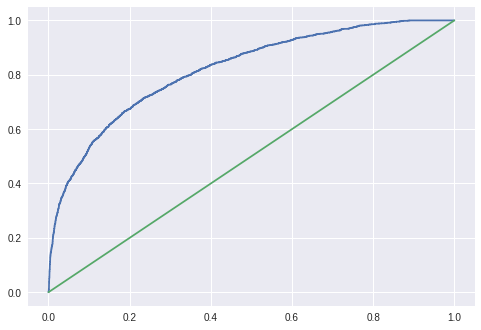

Model ROC AUC:  0.8192134659076808
Random ROC AUC: 0.5


In [4]:
fpr, tpr, thresholds, auc = metrics.roc(test_novelty_scores, test_novelty_labels)

plt.plot(fpr, tpr)
plt.plot([0., 1.], [0., 1.])
plt.show()
print('Model ROC AUC: ', auc)
print('Random ROC AUC: 0.5')

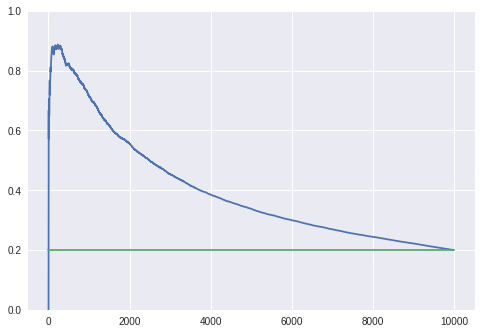

In [5]:
pak = metrics.precision_at_k(test_novelty_scores, test_novelty_labels)

uniques, counts = np.unique(test_novelty_labels, return_counts=True)
random = counts.min() / counts.sum()

plt.plot(pak)
plt.plot([0, 10000], [random, random])
plt.ylim([0., 1.])
plt.show()

In [6]:
print(len(pak))

9984
